# Investigating Fandango Movie Ratings 

In October 2015, Walt Hickey  published his [analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/), suggesting that Fandango's rating system was biased and dishonest.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.


## 1. Understanding the Data

The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17
) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

We will read in and explore briefly the two data sets (fandango_score_comparison.csv and movie_ratings_16_17.csv) 

In [104]:
import pandas as pd

fandango_score = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [105]:
#  Isolate the columns that contain the data we're interested in 
previous = fandango_score[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
after = movie_ratings[[ 'movie', 'year', 'fandango']].copy()

In [106]:
previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [107]:
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of the data is made of all movie rating.  The  data we are working are sample at the time we want. One sample was taken previous to the analysis, and the other after the analysis

Both samples have a set of criteria for sampling conditions, which means they are not raddom.  Not all the movies have an equal chance to be included in the two samples. The resulting samples are very unlikely to be representative of the population we're interested in describing.

## 2. Changing the Goal of our Analysis

At this point, we cam either collect new data, or change the goal of our analysis.  We choose the latter and place some limitations on our initial goal. We changed our goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.


## 3. Isolating the Samples We Need

With the new goal, we now have two populations that we want to describe and compare with each other:

* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

The sample doesn't provide information about the number of fan ratings.   We can sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more. 

In [108]:
after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample. As per Dataquest [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb) these are the fan ratings below:


|Movie | Fan ratings |
| --- | --- |
|Mechanic: Resurrection	| 2247|
|Warcraft	| 7271|
|Max Steel	| 493|
|Me Before You	| 5263|
|Fantastic Beasts and Where to Find Them	| 13400|
|Cell	| 17|
|Genius	| 127|
|Sully	| 11877 |
|A Hologram for the King	| 500 |
|Captain America: Civil War	| 35057|


90% of the movies in the 'after' data set are popular. This is enough and we move forward with a bit more confidence.

As per the documentation, they're only movies with at least 30 fan ratings in the 'previous' data set. Let's also double-check

In [109]:
sum(previous['Fandango_votes'] < 30)

0

Some movies in the data set were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.
  * Isolate the movies released in 2015 in a separate data set.
  * Isolate the movies released in 2016 in another separate data set.
  * These are the data sets we'll use next to perform our analysis.

In [110]:
# transfor 'FILM' column to 'FILM' & 'year' columns
previous['year'] = previous['FILM'].str[-5:-1].astype(int)
previous['FILM'] = previous['FILM'].str[:-7]

In [111]:
# To find out relaase year from 'previous' data set
previous['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [112]:
# to isolate 2015 data
fandango_2015 = previous[previous['year'] == 2015].copy()
print (fandango_2015['year'].value_counts())
fandango_2015.head()

2015    129
Name: year, dtype: int64


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015


In [113]:
# To find out relaase year from 'after' data set
after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [114]:
# to isolate 2016 data
fandango_2016 = after[after['year'] == 2016]
print (fandango_2016['year'].value_counts())
fandango_2016.head()

2016    191
Name: year, dtype: int64


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## 4. Comparing Distribution Shapes for 2015 and 2016

There are many ways we can go about with our analysis, let's start with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

Generate two kernel density plots on the same figure for the distribution of movie ratings of each sample

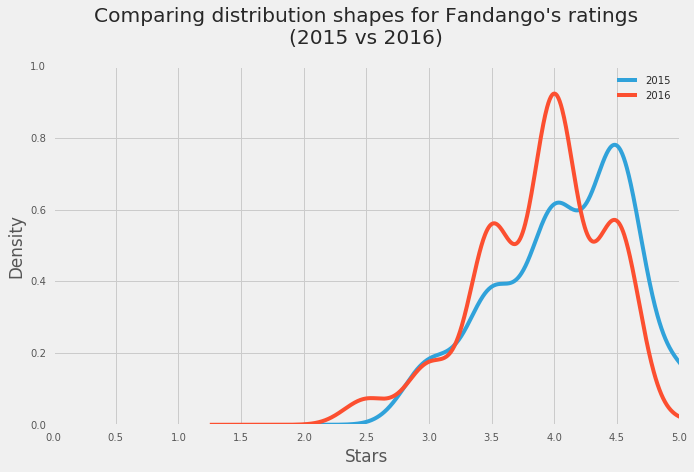

In [115]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(figsize=(10,6), label='2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.05) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5)    #  ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

Two aspects are striking on the figure above:

* Both distributions are strongly left skewed, which suggest that movies on Fandango are mostly given hight ratings.
* The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.  There's a clear difference between the two distributions.  The Fandango's movies ratings in 2016 were rated slightly lower than those in 2015.

##  5. Comparing Relative Frequencies

Because the data sets have different numbers of movies, we us normalize data to show percentages 

In [116]:
print('2015' + '\n' + '-' * 16)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [117]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index()*100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

It's still clear that there is a difference between the two distributions
* In 2016, very high ratings is significantly less than 2015, (13% less)
* Percentage of 3.5-4.0 rating is greater in 2016 than that in 2015.
* The lowest rating is 2.5 in 2016, vs 3.0 in 2015

## 6. Determining the Direction of the Change

In [118]:
# Compute the mean, median, and mode for each distribution.
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015']=[mean_2015,median_2015,mode_2015]
summary['2016']=[mean_2016,median_2016,mode_2016]
summary.index=['mean','median','mode']

summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


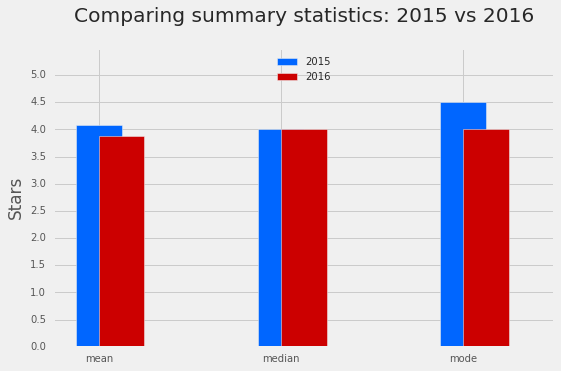

In [119]:
# Compare these metrics and determine what they tell about the direction of the difference.
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()

While the median is the same for both distributions, The mean of 2016 rating is 5% lower than 2015, the mode is lower in 2016 by 0.5. As we can see from the kernel density plot, rating of popular movies release in 2016 were slightly lower than that in 2015

## Conclusion

We have concluded that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015. 